Importing Required Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
import cv2
import pickle
import random

In [31]:

from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Sequential
from matplotlib.image import imread
import matplotlib.pyplot as plt
import tensorflow as tf

Data Path

In [32]:
train = r'C:/Users/Lenovo/OneDrive/Desktop/ML/Data_Sets/Tomatod/tomato/train'
test = r'C:/Users/Lenovo/OneDrive/Desktop/ML/Data_Sets/Tomatod/tomato/val'
size=256

Data Augumentation

In [33]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)



In [34]:
X_train = ImageDataGenerator(rescale=1./255).flow_from_directory(train,
                                      target_size=(size,size),
                                      batch_size=32,
                                      class_mode='categorical',
                                      subset='training')
X_test = ImageDataGenerator(rescale=1./255).flow_from_directory(test,
                                     target_size=(size,size),
                                     batch_size=32,
                                     class_mode='categorical',
                                     subset='training')


Found 5000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [35]:
X_test.class_indices.keys()

dict_keys(['Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy'])

Call back Setup


In [36]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

checkpoint=ModelCheckpoint(r'model70epochs.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=5,
                       verbose=1,
                       restore_best_weights=True)
callbacks=[checkpoint,earlystop]

Modelling Starts

In [37]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(size,size,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

Compiling the Model

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [40]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 16)      

In [41]:
history= model.fit(x=X_train, validation_data=X_test,
                    epochs=10,
                    steps_per_epoch=X_train.samples//32,
                    validation_steps=X_test.samples//32,
                    callbacks=callbacks)

Epoch 1/10
156/156 [==============================] - ETA: 0s - loss: 0.6576 - accuracy: 0.7448
Epoch 1: val_loss improved from inf to 0.40528, saving model to model70epochs.h5
156/156 [==============================] - 234s 1s/step - loss: 0.6576 - accuracy: 0.7448 - val_loss: 0.4053 - val_accuracy: 0.8396
Epoch 2/10
156/156 [==============================] - ETA: 0s - loss: 0.2606 - accuracy: 0.9112
Epoch 2: val_loss improved from 0.40528 to 0.32005, saving model to model70epochs.h5
156/156 [==============================] - 199s 1s/step - loss: 0.2606 - accuracy: 0.9112 - val_loss: 0.3200 - val_accuracy: 0.8938
Epoch 3/10
156/156 [==============================] - ETA: 0s - loss: 0.1735 - accuracy: 0.9366
Epoch 3: val_loss improved from 0.32005 to 0.30023, saving model to model70epochs.h5
156/156 [==============================] - 195s 1s/step - loss: 0.1735 - accuracy: 0.9366 - val_loss: 0.3002 - val_accuracy: 0.8917
Epoch 4/10
156/156 [==============================] - ETA: 0s - l

Output and Graph

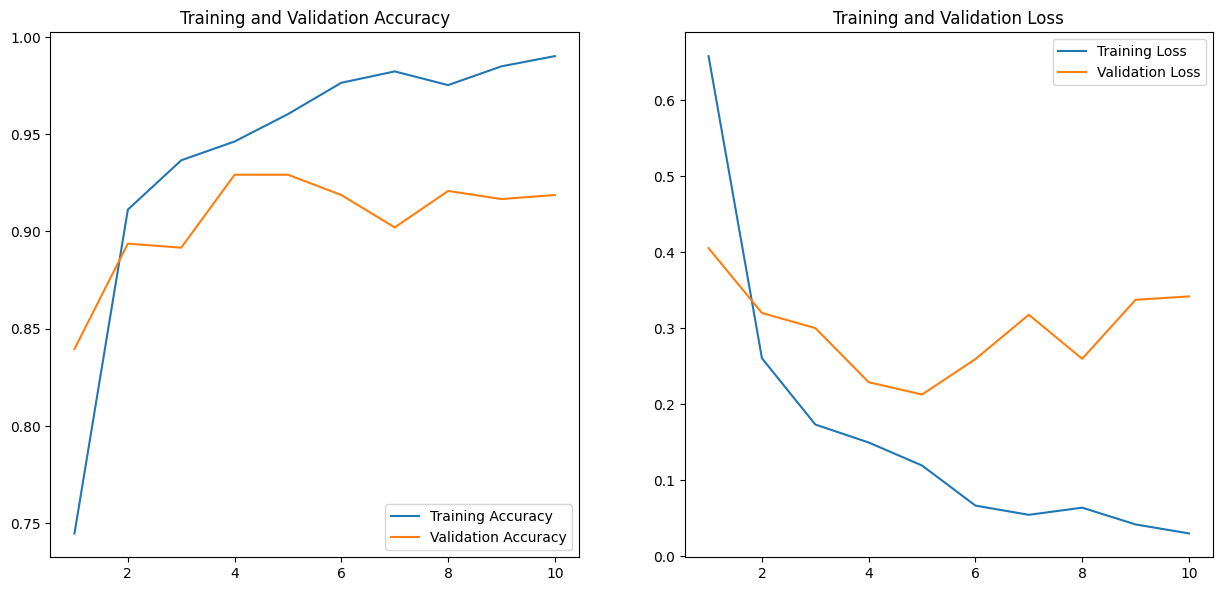

Maximum Accuracy Score =>  99.01368618011475


In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1,11)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print("Maximum Accuracy Score => ",max(acc)*100)

Testing the model

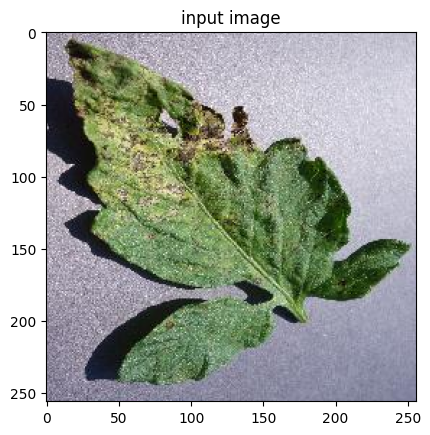

1/1 [==============================] - 0s 97ms/step
Predicted as Septoria_Leaf_Spot


In [43]:
path = "D:/ML/Data_sets/Tomatod/tomato/test/sept.JPG"
img = load_img(path,target_size=(256,256))

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

plt.imshow(input_arr[0])
plt.title('input image')
plt.axis = False
plt.show()
pred = np.argmax(model.predict(input_arr))

if pred == 0:
    print("Predicted as Bacterial_Spot")
elif pred == 1:
    print("Predicted as Late_Blight")
elif pred == 2:
    print("Predicted as Septoria_Leaf_Spot")
elif pred == 3:
    print("Predicted as Yellow_Leaf_Curl")
elif pred == 4:
    print("Predicted as Healthy")

